In [1]:
import time
from tqdm import tnrange

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [3]:
import tensorflow as tf

### Data preparation steps

Using TensorFlow backend.


(50000, 784) (50000,)


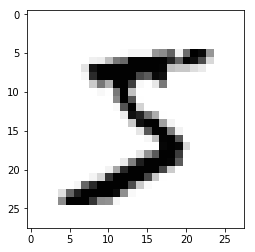

In [4]:
from preprocessed_mnist import load_dataset

X_train, y_train, X_val, y_val, X_test, y_test = load_dataset(flatten=True)
print(X_train.shape, y_train.shape)
plt.imshow(X_train[0].reshape((28, 28)), cmap="Greys");

In [5]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(np.max(X_train[0]))

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
print(y_train[:5])

(50000, 784)
(10000, 784)
(10000, 784)
1.0
(50000,)
(10000,)
(10000,)
[5 0 4 1 9]


In [6]:
y_train = np.eye(10)[y_train]
y_val = np.eye(10)[y_val]
y_test = np.eye(10)[y_test]

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
print(y_train[:5])

(50000, 10)
(10000, 10)
(10000, 10)
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [7]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)
    m = X.shape[0]
    mini_batches = []
        
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation]
    shuffled_Y = Y[permutation]

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = int(np.floor(m / mini_batch_size)) 
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size:(k+1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[k * mini_batch_size:(k+1) * mini_batch_size]
    
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size:]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

### Hi, my felow learner!

I implemented several models with increasing complexity and incresingly better accuracies:

1) Regression: 92% accuaracy <br>
2) NN with 1 hidden layer: 98.0% accuracy <br>
3) NN with 2 hidden layers: 98.2% accuracy <br>

To save your time you can check only the best model, which is in the "Deeper Network" section. It achieves accuracies above 98% after 20 epochs which takes around 4.5 minutes of a single CPU time. 

### Regression

In [8]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

In [9]:
logits = tf.matmul(x, W) + b

y = tf.exp(logits) / tf.reduce_sum(tf.exp(logits), axis = 1, keep_dims=True)
# y2 = tf.nn.softmax(logits)

loss = tf.reduce_mean(tf.reduce_sum(- y_ * tf.log(y), axis = 1, keep_dims=True))
# loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=logits))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [10]:
s = tf.InteractiveSession()

In [11]:
tf.global_variables_initializer().run()

for epoch in range(10):
    i = 0
    train_mini_batches = random_mini_batches(X_train, y_train, mini_batch_size = 64, seed = i)
    
    for minibatch_X_train, minibatch_y_train in train_mini_batches:
        s.run(train_step, feed_dict={x : minibatch_X_train, y_ : minibatch_y_train})
        
    train_loss = s.run(loss, feed_dict={x : X_train, y_ : y_train})
    val_acc = s.run(acc, feed_dict={x : X_val, y_ : y_val})
    print("epoch %i: train_loss = %.4f, val_acc = %.4f" % (epoch, train_loss, val_acc))  

epoch 0: train_loss = 0.3721, val_acc = 0.9084
epoch 1: train_loss = 0.3337, val_acc = 0.9157
epoch 2: train_loss = 0.3163, val_acc = 0.9178
epoch 3: train_loss = 0.3058, val_acc = 0.9204
epoch 4: train_loss = 0.2986, val_acc = 0.9224
epoch 5: train_loss = 0.2931, val_acc = 0.9232
epoch 6: train_loss = 0.2888, val_acc = 0.9241
epoch 7: train_loss = 0.2852, val_acc = 0.9239
epoch 8: train_loss = 0.2823, val_acc = 0.9242
epoch 9: train_loss = 0.2797, val_acc = 0.9247


In [12]:
test_acc = s.run(acc, feed_dict={x : X_test, y_ : y_test})
print('Final test accuracy is: {:.4f}'.format(test_acc))    

Final test accuracy is: 0.9224


### Shallow Network

With 1-hidden layer network I achieved only around 98.0% accuracy.

In [13]:
n_x = 784
n_h1 = 100
n_y = 10

tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, n_x])
y_ = tf.placeholder(tf.float32, [None, n_y])

W1 = tf.Variable(tf.random_normal([n_x, n_h1], stddev=0.1))
# W1 = tf.Variable(np.random.normal(size = [n_x, n_h1]), dtype=tf.float32)
b1 = tf.Variable(tf.zeros([n_h1]))

W2 = tf.Variable(tf.random_normal([n_h1, n_y], stddev=0.1))
# W2 = tf.Variable(np.random.normal(size = [n_h1, n_y]), dtype=tf.float32)
b2 = tf.Variable(tf.zeros([n_y]))

In [14]:
logits1 = tf.matmul(x, W1) + b1
a1 = tf.nn.relu(logits1)

logits2 = tf.matmul(a1, W2) + b2
y = tf.nn.softmax(logits2)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=logits2))

correct_prediction = tf.equal(tf.argmax(y, axis=1), tf.argmax(y_, axis=1))
acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [15]:
s = tf.InteractiveSession()

In [16]:
global_step = tf.Variable(0, trainable=False)

# lr = tf.placeholder(tf.float32, shape=[])
learning_rate = tf.train.exponential_decay(0.003, global_step, 200, 0.98)

beta1 = tf.placeholder(tf.float32, shape=[])
beta2 = tf.placeholder(tf.float32, shape=[])


# train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step = global_step)
# train_step = tf.train.MomentumOptimizer(learning_rate, be1).minimize(loss)
train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss, global_step = global_step)

tf.global_variables_initializer().run()

In [17]:
%%time

lr = 0.5
be1 = 0.9
be2 = 0.999

train_losses = []
train_accs = []
val_accs = []

beta_train_acc = 0.99
train_acc = 0

for epoch in range(30):
    i = 0
    train_mini_batches = random_mini_batches(X_train, y_train, mini_batch_size = 64, seed = int(time.time()))
    
    for minibatch_X_train, minibatch_y_train in train_mini_batches:
        _, train_acc_batch = s.run([train_step, acc], feed_dict = {x : minibatch_X_train, 
                                                                   y_ : minibatch_y_train,
#                                                                    learning_rate : lr,
                                                                   beta1 : be1,
                                                                   beta2 : be2})
        
        train_acc = beta_train_acc * train_acc + (1 - beta_train_acc) * train_acc_batch
        
    train_loss = s.run(loss, feed_dict={x : X_train, y_ : y_train})
    val_acc = s.run(acc, feed_dict={x : X_val, y_ : y_val})
    train_losses.append(train_loss)
    val_accs.append(val_acc)
    lr, gs = s.run([learning_rate, global_step])
    
    
    print("epoch {:3d}, global_step = {:5d}, lr = {:.4e}: train_loss = {:.4e}, train_acc = {:.4f}, val_acc = {:.4f}".format(
        epoch, gs, lr, train_loss * 10000, train_acc, val_acc))

epoch   0, global_step =   782, lr = 2.7721e-03: train_loss = 1.2859e+03, train_acc = 0.9534, val_acc = 0.9587
epoch   1, global_step =  1564, lr = 2.5616e-03: train_loss = 7.5287e+02, train_acc = 0.9686, val_acc = 0.9684
epoch   2, global_step =  2346, lr = 2.3670e-03: train_loss = 4.9874e+02, train_acc = 0.9769, val_acc = 0.9743
epoch   3, global_step =  3128, lr = 2.1872e-03: train_loss = 4.0411e+02, train_acc = 0.9819, val_acc = 0.9727
epoch   4, global_step =  3910, lr = 2.0211e-03: train_loss = 3.0286e+02, train_acc = 0.9862, val_acc = 0.9753
epoch   5, global_step =  4692, lr = 1.8676e-03: train_loss = 2.1337e+02, train_acc = 0.9897, val_acc = 0.9759
epoch   6, global_step =  5474, lr = 1.7258e-03: train_loss = 1.6876e+02, train_acc = 0.9928, val_acc = 0.9750
epoch   7, global_step =  6256, lr = 1.5947e-03: train_loss = 1.2715e+02, train_acc = 0.9945, val_acc = 0.9765
epoch   8, global_step =  7038, lr = 1.4736e-03: train_loss = 1.9326e+02, train_acc = 0.9964, val_acc = 0.9741
e

In [18]:
test_acc = s.run(acc, feed_dict={x : X_test, y_ : y_test})
print('Final test accuracy is: {:.4f}'.format(test_acc))    

Final test accuracy is: 0.9803


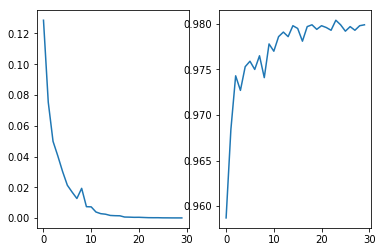

In [19]:
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(train_losses)), train_losses)

plt.subplot(1, 2, 2)
plt.plot(np.arange(len(train_losses)), val_accs)

### Deeper Network

With 2-hidden layer network I achieved a nice accuracy of 98.2% after 20 epochs. On my PC 20 epochs take 4 min of CPU time.

In [20]:
n_x = 784
n_h1 = 100
n_h2 = 100
n_y = 10

tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, n_x])
y_ = tf.placeholder(tf.float32, [None, n_y])

W1 = tf.Variable(tf.random_normal([n_x, n_h1], stddev=0.1))
# W1 = tf.Variable(np.random.normal(size = [n_x, n_h1]), dtype=tf.float32)
b1 = tf.Variable(tf.zeros([n_h1]))

W2 = tf.Variable(tf.random_normal([n_h1, n_h2], stddev=0.1))
# W2 = tf.Variable(np.random.normal(size = [n_h1, n_h2]), dtype=tf.float32)
b2 = tf.Variable(tf.zeros([n_h2]))


W3 = tf.Variable(tf.random_normal([n_h2, n_y], stddev=0.1))
# Wy = tf.Variable(np.random.normal(size = [n_h1, n_y]), dtype=tf.float32)
b3 = tf.Variable(tf.zeros([n_y]))

In [21]:
logits1 = tf.matmul(x, W1) + b1
a1 = tf.nn.relu(logits1)

logits2 = tf.matmul(a1, W2) + b2
a2 = tf.nn.relu(logits2)

logits3 = tf.matmul(a2, W3) + b3
y = tf.nn.softmax(logits3)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_, logits = logits3))

correct_prediction = tf.equal(tf.argmax(y, axis = 1), tf.argmax(y_, axis = 1))
acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [22]:
s = tf.InteractiveSession()

In [23]:
global_step = tf.Variable(0, trainable=False)

# lr = tf.placeholder(tf.float32, shape=[])
learning_rate = tf.train.exponential_decay(0.003, global_step, 200, 0.98, staircase=False)

beta1 = tf.placeholder(tf.float32, shape=[])
beta2 = tf.placeholder(tf.float32, shape=[])


# train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step = global_step)
# train_step = tf.train.MomentumOptimizer(learning_rate, 0.9).minimize(loss, global_step = global_step)
train_step = tf.train.AdamOptimizer(learning_rate, 0.85).minimize(loss, global_step = global_step)

tf.global_variables_initializer().run()

In [24]:
%%time

lr = 0.5
be1 = 0.9
be2 = 0.999

train_losses = []
train_accs = []
val_accs = []

beta_train_acc = 0.99
train_acc = 0

for epoch in range(30):
    
    train_mini_batches = random_mini_batches(X_train, y_train, mini_batch_size = 64, seed = int(time.time() * 1000 % 1024))
    
    for minibatch_X_train, minibatch_y_train in train_mini_batches:
        feed_dict = {x : minibatch_X_train, 
                     y_ : minibatch_y_train,
#                      learning_rate : lr,
#                      beta1 : be1,
#                      beta2 : be2
                    }
        _, train_acc_batch = s.run([train_step, acc], feed_dict)
        
        train_acc = beta_train_acc * train_acc + (1 - beta_train_acc) * train_acc_batch
        
    train_loss = s.run(loss, feed_dict={x : X_train, y_ : y_train})
    val_acc = s.run(acc, feed_dict={x : X_val, y_ : y_val})
#     test_acc = s.run(acc, feed_dict={x : X_test, y_ : y_test})
    train_losses.append(train_loss)
    val_accs.append(val_acc)
    lr, gs = s.run([learning_rate, global_step])
    
    
    print("epoch {:3d}, global_step = {:5d}, lr = {:.4e}: train_loss = {:.4e}, train_acc = {:.4f}, val_acc = {:.4f}".format(
        epoch, gs, lr, train_loss * 10000, train_acc, val_acc))

epoch   0, global_step =   782, lr = 2.7721e-03: train_loss = 1.0273e+03, train_acc = 0.9543, val_acc = 0.9650
epoch   1, global_step =  1564, lr = 2.5616e-03: train_loss = 6.6024e+02, train_acc = 0.9705, val_acc = 0.9693
epoch   2, global_step =  2346, lr = 2.3670e-03: train_loss = 4.6701e+02, train_acc = 0.9773, val_acc = 0.9732
epoch   3, global_step =  3128, lr = 2.1872e-03: train_loss = 2.7975e+02, train_acc = 0.9823, val_acc = 0.9761
epoch   4, global_step =  3910, lr = 2.0211e-03: train_loss = 1.9790e+02, train_acc = 0.9849, val_acc = 0.9782
epoch   5, global_step =  4692, lr = 1.8676e-03: train_loss = 2.7643e+02, train_acc = 0.9863, val_acc = 0.9740
epoch   6, global_step =  5474, lr = 1.7258e-03: train_loss = 2.5089e+02, train_acc = 0.9921, val_acc = 0.9760
epoch   7, global_step =  6256, lr = 1.5947e-03: train_loss = 1.2614e+02, train_acc = 0.9929, val_acc = 0.9773
epoch   8, global_step =  7038, lr = 1.4736e-03: train_loss = 7.7695e+01, train_acc = 0.9955, val_acc = 0.9769
e

In [25]:
test_acc = s.run(acc, feed_dict={x : X_test, y_ : y_test})
print('Final test accuracy is: {:.4f}'.format(test_acc)) 

Final test accuracy is: 0.9806


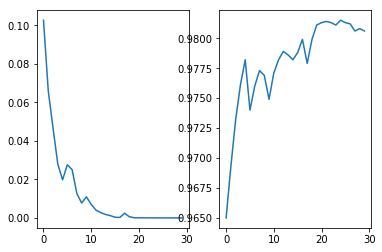

In [26]:
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(train_losses)), train_losses)

plt.subplot(1, 2, 2)
plt.plot(np.arange(len(train_losses)), val_accs)